### What is Autograd?
* Autograd is PyTorch's automatic differentiation library
* It enables gradient computation, which is essential for training ML models using optimization algorithms like gradient descent.
---
#### Example:-
1. y= $x^2$
2. y= $x^2$ , x=sin(y)
3. Neural networks
### Why is Autograd Important?

1. **Automatic Gradient Computation**
2. **Ease of Backpropagation**
3. **Dynamic Computation Graph**
4. **Handles Complex Functions**
5. **Optimized for Machine Learning**

### Summary
Autograd is essential for training deep learning models. It automates derivative calculations for complex functions, saves time, and ensures accuracy in gradient computations. This makes PyTorch a powerful and user-friendly library for machine learning practitioners.


#### Example :1

In [134]:
import torch

In [135]:
x=torch.tensor(3.0,requires_grad=True)
# requires_grad=True is used to calculate the gradient of the tensor

In [136]:
y=x**2
print("x: ",x)
print("y: ",y)

x:  tensor(3., requires_grad=True)
y:  tensor(9., grad_fn=<PowBackward0>)


In [137]:
y.backward() # calculate the gradient of y wrt x using backward() function

In [138]:
x.grad # print the gradient of y wrt x

tensor(6.)

#### Example :2

In [139]:
x=torch.tensor(3.0,requires_grad=True)
y=x**2
z=torch.sin(y)

In [140]:
print("x: ",x)
print("y: ",y)
print("z: ",z)

x:  tensor(3., requires_grad=True)
y:  tensor(9., grad_fn=<PowBackward0>)
z:  tensor(0.4121, grad_fn=<SinBackward0>)


In [141]:
z.backward() # calculate the gradient of z wrt x using backward() function

In [142]:
x.grad # print the gradient of z wrt x

tensor(-5.4668)

In [143]:
# y.grad # since y is an intermediate variable, it's gradient is not calculated


#### Example :3 (neural networks) [perceptron]

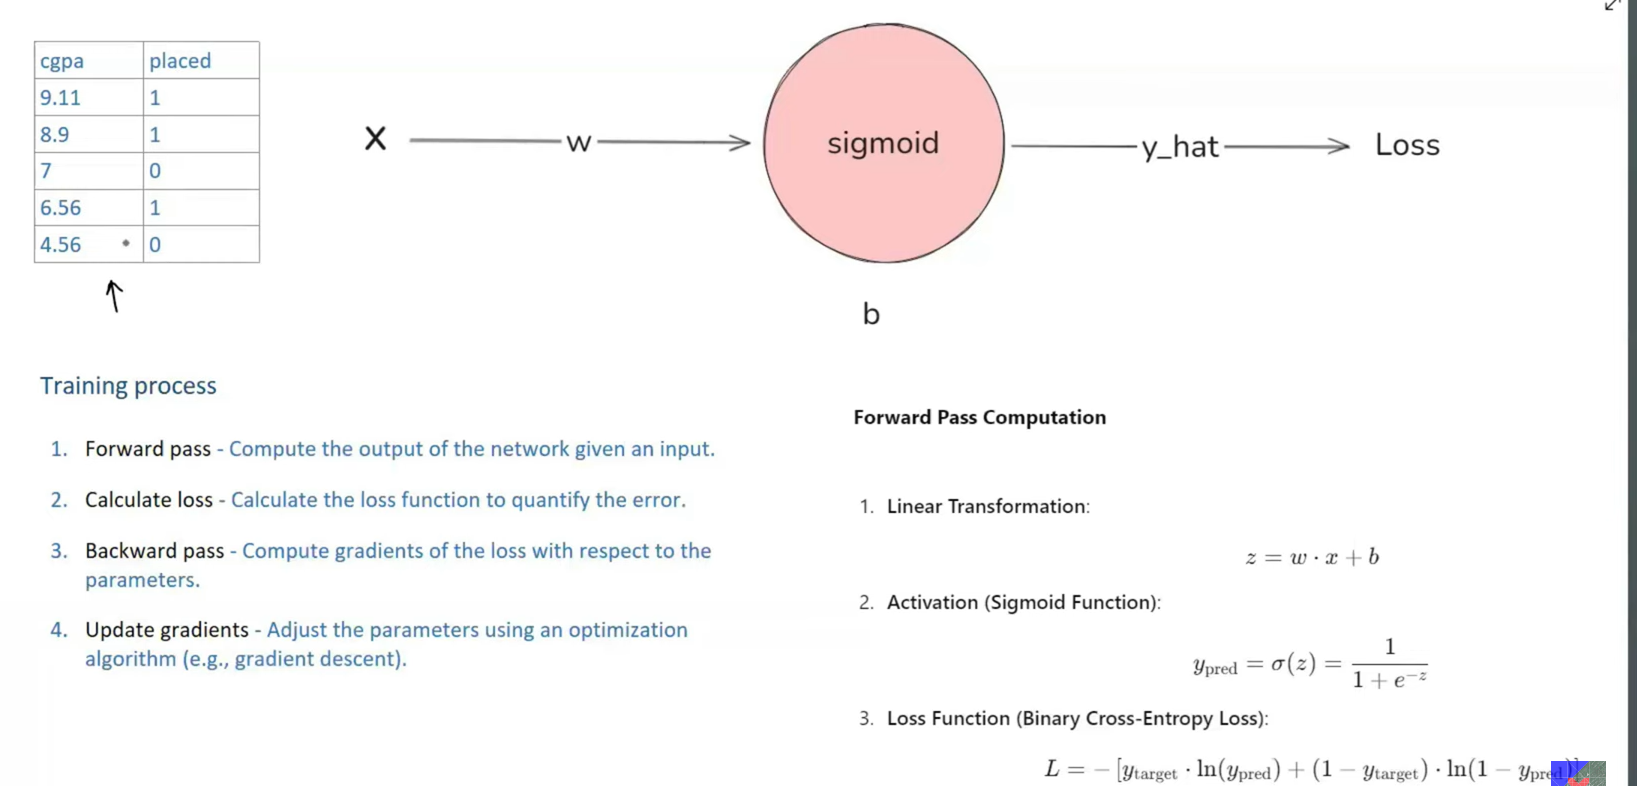

In [144]:
x=torch.tensor(6.7) # input Feature
y=torch.tensor(0.0) # True label (binary classification)

w=torch.tensor(1.0) # weight
b=torch.tensor(0.0) # bias

In [145]:
# binary cross entropy loss for scalar input
def binary_cross_entropy(prediction,target):
    epsilon=1e-8 # to avoid log(0)
    prediction=torch.clamp(prediction,epsilon,1-epsilon)
    return -(target*torch.log(prediction)+(1-target)*torch.log(1-prediction))

In [146]:
# forward pass
z=w*x+b # linear model 
y_pred=torch.sigmoid(z) # sigmoid activation function to convert the output to probability

# compute the loss using binary cross entropy
loss=binary_cross_entropy(y_pred,y)

In [147]:
# derivative of loss wrt w and b
#  1. dl/dy_pred = -y/y_pred + (1-y)/(1-y_pred) loss wrt y_pred
dloss_dy_pred=-(y/y_pred)+((1-y)/(1-y_pred))
#  2. dy_pred/dz = y_pred*(1-y_pred) derivative of sigmoid function
dy_pred_dz=y_pred*(1-y_pred)
#  3. dz/dw  and dz/db : z with respect to w and b
dz_dw=x # dz/dw = x
dz_db=1.0 # dz/db = 1 (bias contribution directly to z)

dl_dw=dloss_dy_pred*dy_pred_dz*dz_dw 
dl_db=dloss_dy_pred*dy_pred_dz*dz_db

In [148]:
print(f"manual gradient of loss wrt weights(dw): {dl_dw}")
print(f"manual gradient of loss wrt bias(db): {dl_db}")

manual gradient of loss wrt weights(dw): 6.691762447357178
manual gradient of loss wrt bias(db): 0.998770534992218


use a Autograd for this

In [149]:
x=torch.tensor(6.7)
y=torch.tensor(0.0)

In [150]:
w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(0.0,requires_grad=True)

In [151]:
print("Initial weights: ",w)
print("Initial bias: ",b)

Initial weights:  tensor(1., requires_grad=True)
Initial bias:  tensor(0., requires_grad=True)


In [152]:
z=w*x+b
y_pred=torch.sigmoid(z)
print(" prediction: ",y_pred)

 prediction:  tensor(0.9988, grad_fn=<SigmoidBackward0>)


In [153]:
loss=binary_cross_entropy(y_pred,y)
print(" loss: ",loss)

 loss:  tensor(6.7012, grad_fn=<NegBackward0>)


In [154]:
loss.backward()

In [155]:
print("Gradient of loss wrt weights: ",w.grad)
print("Gradient of loss wrt bias: ",b.grad)

Gradient of loss wrt weights:  tensor(6.6918)
Gradient of loss wrt bias:  tensor(0.9988)


In [156]:
#  with vector input
x=torch.tensor([1.0,2.0,3.0],requires_grad=True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [157]:
y=(x**2).mean()
print("y: ",y)

y:  tensor(4.6667, grad_fn=<MeanBackward0>)


In [158]:
y.backward()

In [159]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [160]:
# clearing the gradient
x=torch.tensor(3.0,requires_grad=True)
print("x: ",x)

x:  tensor(3., requires_grad=True)


In [161]:
y=x**2
print("y: ",y)
y.backward()
print(x.grad)
x.grad.zero_() # clear the gradient

y:  tensor(9., grad_fn=<PowBackward0>)
tensor(6.)


tensor(0.)

In [162]:
#  how to disable gradient tracking
x=torch.tensor(3.0,requires_grad=True)
print("x: ",x)


x:  tensor(3., requires_grad=True)


In [163]:
y=x**2
print("y: ",y)

y:  tensor(9., grad_fn=<PowBackward0>)


In [164]:
y.backward()
print(x.grad)

tensor(6.)


In [166]:
# diasble gradient tracking
# option 1 : using torch.no_grad()
x.requires_grad_(False)
y=x**2

tensor(3.)

In [167]:
print(y)
y.backward() # this will throw an error

In [168]:
#  option 2 : using torch.set_grad_enabled(False)

tensor(9.)

In [170]:
x=torch.tensor(3.0,requires_grad=True)
z=x.detach()

In [171]:
print("z: ",z)
print("x: ",x)

z:  tensor(3.)
x:  tensor(3., requires_grad=True)


In [172]:
y=x**2
print("y: ",y)

y:  tensor(9., grad_fn=<PowBackward0>)


In [173]:
y1=z**2

In [174]:
y.backward()

In [175]:
y1.backward() # this will throw an error

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [178]:
# option 3 : using with torch.no_grad()
x=torch.tensor(3.0,requires_grad=True)
print("x: ",x)

with torch.no_grad():
    y=x**2

x:  tensor(3., requires_grad=True)


In [179]:
y.backward() # this will throw an error

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn